In [56]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

Requirement already up-to-date: azure-cognitiveservices-vision-computervision in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [62]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials


In [66]:
% matplotlib inline 
from skimage import data, draw
from skimage import transform, util
import numpy as np
from skimage import filters, color
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray

In [63]:
endpoint = "https://ecopaint.cognitiveservices.azure.com/"
subscription_key = "49a9f5371c7a4bb7860dc7b7dc123845"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

Análisis de imagen

In [76]:
# Ponemos un URL de la imagen que vamos a analizar
remote_image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTo3KG-JiCCw1cdrNy93kxFR8oxDIEtGk-HJg&usqp=CAU"

(209, 241, 3)


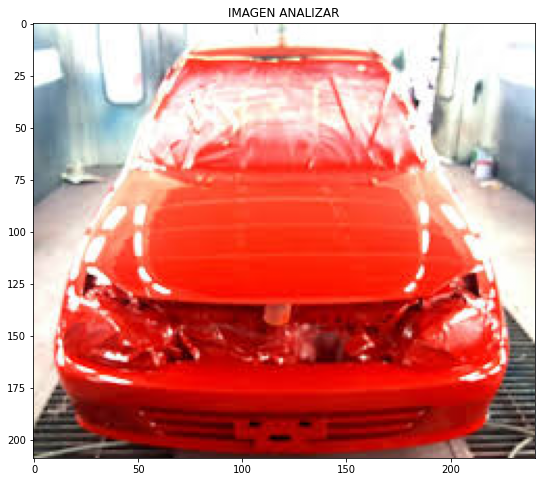

In [77]:
hl_color = np.array([0, 1, 0])

img = imread(remote_image_url)
print(img.shape)
img = util.img_as_float(img)
eimg = filters.sobel(color.rgb2gray(img))

plt.figure(figsize=(10,8))
plt.title('IMAGEN ANALIZAR')
plt.imshow(img)

In [78]:

print("===== Análisis de la imagen =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url )

# Get the captions (descriptions) from the response, with confidence level
print("Descripción de la imagen: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' Con una seguridad de {:.2f}%".format(caption.text, caption.confidence * 100))

===== Análisis de la imagen =====
Description of remote image: 
'a red car with a hood' with confidence 35.72%


In [79]:
from pprint import pprint

pprint(description_results.as_dict())

{'captions': [{'confidence': 0.35715124011039734,
               'text': 'a red car with a hood'}],
 'metadata': {'format': 'Jpeg', 'height': 209, 'width': 241},
 'request_id': '290c0b08-183d-455c-a039-ed2c9f2a95e7',
 'tags': ['red', 'car', 'transport']}


In [80]:
# Jala las descripciones de la respuesta
print("Descripción de la imagen: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

Descripción de la imagen: 
'a red car with a hood' with confidence 35.72%


Detección del color 


In [82]:

print("=====Detección de colores =====")
#
remote_image_features = ["color"]
# Llamada a API
detect_color_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

print("Obteniendo el esquema de color de la imagen: ")
print("Codifo de color: #{}".format(detect_color_results_remote.color.accent_color))
print("Color de fondo dominante: {}".format(detect_color_results_remote.color.dominant_color_background))
print("Color de primer plano dominante: {}".format(detect_color_results_remote.color.dominant_color_foreground))
print("Colores dominantes: {}".format(detect_color_results_remote.color.dominant_colors))

=====Detección de colores =====
Obteniendo el esquema de color de la imagen: 
Codifo de color: #C32108
Color de fondo dominante: White
Color de primer plano dominante: Red
Colores dominantes: ['Red', 'White']
